<img src="images/globus-logo.png" width=250 alt="Globus logo"></img>
<img src="images/esgf.png" width=250 alt="ESGF logo"></img>

# Basic Demonstration of Data Reduction Using Globus, Intake-ESGF, and Clisops

## Overview
Within this notebook, we highlight how to use a collection of open-source tools in the Earth System Grid Federation user-computing community, to reduce and select datasets available through the federation of servers. Mainly, we will
- Select a given time frame
- Subset for a point
- Average into yearly frequency

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Intro to Xarray](https://foundations.projectpythia.org/core/xarray/xarray-intro.html) | Necessary | |
| [hvPlot Basics](https://hvplot.holoviz.org/getting_started/hvplot.html) | Necessary | Interactive Visualization with hvPlot |
- **Time to learn**: 30 minutes

## Imports

In [10]:
import hvplot.xarray
import holoviews as hv
import numpy as np
import hvplot.xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from intake_esgf import ESGFCatalog
import xarray as xr
import warnings
from clisops.ops.subset import subset, subset_bbox
from clisops.ops.average import average_over_dims, average_time
import os
from globus_compute_sdk import Executor, Client
warnings.filterwarnings("ignore")

hv.extension("matplotlib")

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

## Search and Find Data Using Intake-ESGF
Let's start with a sample dataset - which we can search for using intake-esgf.

In [2]:
cat = ESGFCatalog()
cat

Perform a search() to populate the catalog.

In [3]:
cat.search(
    experiment_id="historical",
    source_id="CanESM5",
    frequency="mon",
    variable_id=["gpp", "tas", "pr"],
    variant_label="r1i1p1f1",  # addition from the last search
)

   Searching indices: 100%|███████████████████████████████|1/1 [    4.22s/index]


Summary information for 3 results:
mip_era                  [CMIP6]
activity_id               [CMIP]
institution_id           [CCCma]
source_id              [CanESM5]
experiment_id       [historical]
member_id             [r1i1p1f1]
table_id            [Amon, Lmon]
variable_id       [tas, pr, gpp]
grid_label                  [gn]
dtype: object

In [4]:
dsd = cat.to_dataset_dict()
dsd.keys()

Adding cell measures: 100%|███████████████████████████████|3/3 [  3.04s/dataset]


dict_keys(['Amon.tas', 'Lmon.gpp', 'Amon.pr'])

In [5]:
ds = dsd["Amon.tas"]
ds

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 64, lon: 128)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
  * lat        (lat) float64 -87.86 -85.1 -82.31 -79.53 ... 82.31 85.1 87.86
  * lon        (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
    areacella  (lat, lon) float32 ...
Attributes: (12/53)
    CCCma_model_hash:            3dedf95315d603326fde4f5340dc0519d80d10c0
    CCCma_parent_runid:          rc3-pictrl
    CCCma_pycmor_hash:           33c30511acc319a98240633965a04ca99c26427e
    CCCma_runid:                 rc3.1-his01
    Conventions:                 CF-1.7 CMIP-6.2
    YMDH_branch_time_in_child:   1850:01:01:00
    ...                          ...
    tracking_id:                 hdl:21.14100/872062df-acae-499b-aa0f-9eaca76...
    variable_id:                 tas
    variant_label:               r1i1p1f1
    version:                     v20190429
    license:                     CMIP6 model data produced by The Government ...
    cmor_version:                3.4.0

## Use clisops to subset for time and location

In [21]:
def subset_time(ds, start_time="1850-01-01T12:00:00Z", end_time="2014-12-30T12:00:00Z"):
    from clisops.ops.subset import subset
    
    return subset(ds, time=f"{start_time}/{end_time}", output="xarray")

def subset_location(ds, lat_bounds=[30, 50], lon_bounds=[-100, -80]):
    from clisops.ops.subset import subset_bbox
    
    return subset_bbox(ds, lat_bnds=lat_bounds, lon_bnds=lon_bounds)

:QuadMesh   [lon,lat]   (tas)
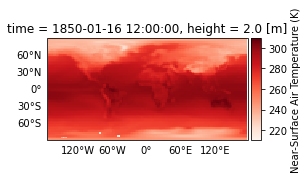

In [26]:
ds.tas.isel(time=0).hvplot.quadmesh(geo=True, cmap="Reds")

:Overlay
   .Land.I    :Feature   [Longitude,Latitude]
   .Ocean.I   :Feature   [Longitude,Latitude]
   .Image.I   :Image   [lon,lat]   (tas)
   .Borders.I :Feature   [Longitude,Latitude]
   .Lakes.I   :Feature   [Longitude,Latitude]
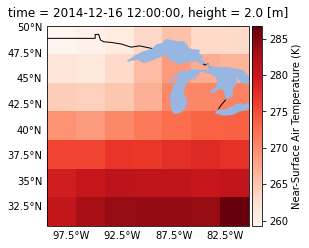

In [27]:
subset_location(ds).tas.isel(time=-1).hvplot(x='lon',
                                             y='lat',
                                             features=["land", "lakes", "ocean", "borders"],
                                             cmap='Reds',
                                             geo=True)

### Calculate a yearly average

In [31]:
def yearly_average(ds):
    from clisops.ops.average import average_time
    return average_time(ds, "year", output_type="xarray")[0]

:Overlay
   .Land.I    :Feature   [Longitude,Latitude]
   .Ocean.I   :Feature   [Longitude,Latitude]
   .Image.I   :Image   [lon,lat]   (tas)
   .Borders.I :Feature   [Longitude,Latitude]
   .Lakes.I   :Feature   [Longitude,Latitude]
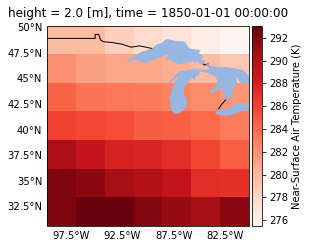

In [40]:
yearly_average(subset_location(ds)).isel(time=0).tas.hvplot(x='lon',
                                             y='lat',
                                             features=["land", "lakes", "ocean", "borders"],
                                             cmap='Reds',
                                             geo=True)

:Overlay
   .Land.I    :Feature   [Longitude,Latitude]
   .Ocean.I   :Feature   [Longitude,Latitude]
   .Image.I   :Image   [lon,lat]   (tas)
   .Borders.I :Feature   [Longitude,Latitude]
   .Lakes.I   :Feature   [Longitude,Latitude]
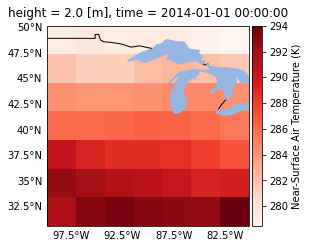

In [42]:
yearly_average(subset_location(ds)).isel(time=-1).tas.hvplot(x='lon',
                                             y='lat',
                                             features=["land", "lakes", "ocean", "borders"],
                                             cmap='Reds',
                                             geo=True)

## Summary
In this notebook, we applied data reduction functions from the ESGF stack to data accessed through intake-esgf.

### What's next?
We will see some more advanced examples of using these functions, including full task orchestration using Globus-Flows.

## Resources and references
- [Intake-ESGF Documentation](https://github.com/nocollier/intake-esgf)
- [Globus Compute Documentation](https://www.globus.org/compute)